<a href="https://colab.research.google.com/github/chloevan/python_visualisation/blob/master/matplotlib/matplotlib_09_lollipop_chart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
title: "matplotlib - 09 lollipop"
date: 2020-05-26T11:15:47+09:00
tags:
  - "Data Visualisation"
  - "Python"
  - "lollipop"
  - "Matplotlib"
categories:
  - "Data Visualisation"
  - "Python"
  - "lollipop"
  - "Matplotlib"
menu: 
  python:
    name: matplotlib - 09 lollipop
---

## 공지

제 수업을 듣는 사람들이 계속적으로 실습할 수 있도록 강의 파일을 만들었습니다. 늘 도움이 되기를 바라며. 참고했던 교재 및 Reference는 꼭 확인하셔서 교재 구매 또는 관련 Reference를 확인하시기를 바랍니다. 



## I. Matplotlib & Seaborn

### (1) 기본 개요
`Matplotlib`는 파이썬 표준 시각화 도구라고 불리워지며 파이썬 그래프의 기본 토대가 된다고 해도 무방하다. 객체지향 프로그래밍을 지원하므로 세세하게 꾸밀 수 있다. 

`Seaborn` 그래는 파이썬 시각화 도구의 고급 버전이다. `Matplotlib`에 비해 비교적 단순한 인터페이스를 제공하기 때문에 초보자도 어렵지 않게 배울 수 있다. 

### (2) matplotlib & Seabon 설치

설치방법은 윈도우 명령 프롬프트, MacOS, Linux 터미널에서 `pip install matplotlib`입력하면 되지만, 간혹 여러 환경에 따라 달라질 수 있으니 관련 싸이트에서 확인하기를 바란다. 
- matplotlib 설치 방법: https://matplotlib.org/users/installing.html
- seaborn 설치 방법: https://seaborn.pydata.org/installing.html


## II. Lollipop Chart

`Lollipop` 차트는 데이터의 순위를 표시하는 데 사용될 수 있다. 이것은 보통 `정렬된 막대 그래프`와 유사하다. 

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

### (1) 데이터 수집
- `cardata.csv` 파일을 가져온다.  

In [12]:
url = 'https://raw.githubusercontent.com/chloevan/datasets/master/books/eda_with_python/cardata.csv'
carDF = pd.read_csv(url)
print(carDF.head())

  manufacturer model  displ  year  cyl       trans drv  cty  hwy fl    class
0         audi    a4    1.8  1999    4    auto(l5)   f   18   29  p  compact
1         audi    a4    1.8  1999    4  manual(m5)   f   21   29  p  compact
2         audi    a4    2.0  2008    4  manual(m6)   f   20   31  p  compact
3         audi    a4    2.0  2008    4    auto(av)   f   21   30  p  compact
4         audi    a4    2.8  1999    6    auto(l5)   f   16   26  p  compact


### (2) groupby
- `manufacturer`를 가지고 `groupby`를 진행한다. 

In [13]:
processedDF = carDF[['cty', 'manufacturer']].groupby('manufacturer').apply(lambda x: x.mean())
print(processedDF.head())

                    cty
manufacturer           
audi          17.611111
chevrolet     15.000000
dodge         13.135135
ford          14.000000
honda         24.444444


### (3) sorting and reset_index
- 이제, `cty`를 통해 정렬 후, `index`를 진행한다.


In [14]:
# sort the values by cty and reset index
processedDF.sort_values('cty', inplace=True)
processedDF.reset_index(inplace=True)
print(processedDF.head())

  manufacturer        cty
0      lincoln  11.333333
1   land rover  11.500000
2        dodge  13.135135
3      mercury  13.250000
4         jeep  13.500000


### (4) 그래프 작성
- 이제 그래프를 작성해보자. 


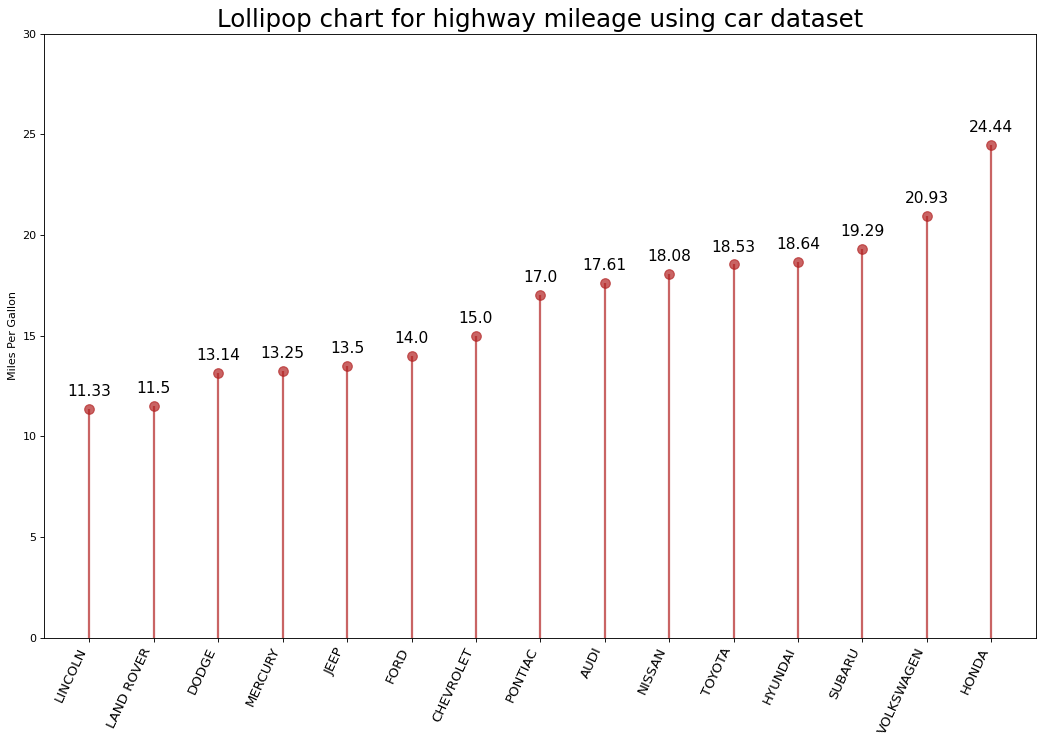

In [27]:
fig, ax = plt.subplots(figsize=(16,10), dpi = 80)
ax.vlines(x = processedDF.index, 
          ymin = 0, 
          ymax = processedDF.cty, 
          color = 'firebrick', 
          alpha = 0.7, 
          linewidth=2)
ax.scatter(x=processedDF.index, 
           y=processedDF.cty, 
           s=75, 
           color='firebrick', 
           alpha=0.7)
## Title 작성
ax.set_title('Lollipop chart for highway mileage using car dataset', 
             fontdict={'size':22})
## Labels, xticks, and ylims
ax.set_ylabel('Miles Per Gallon')
ax.set_xticks(processedDF.index)
ax.set_xticklabels(processedDF.manufacturer.str.upper(), 
                   rotation=65, 
                   fontdict={'horizontalalignment':'right', 'size':12})
ax.set_ylim(0, 30)
# 그래프에 평균 값 표시하기
for row in processedDF.itertuples():
    ax.text(row.Index, 
            row.cty+.5, 
            s=round(row.cty, 2), 
            horizontalalignment= 'center', 
            verticalalignment='bottom', 
            fontsize=14)

# 8. Display the plot on the screen
plt.show()

 ## III. 실습파일
- 구글코랩에서 빠르게 실습도 할 수 있습니다. [실습](https://colab.research.google.com/github/chloevan/python_visualisation/blob/master/matplotlib/matplotlib_09_lollipop_chart.ipynb)



## IV. Reference
Mukhiya, Uuresh Kumar. Ahmed Usman. Hands-on Exploratory Data Analysis With Python: Perform EDA Techniques to understand, Summarize, and Investigate Your Data. Packt publishing limited, 2020.